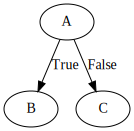

In [7]:
from graphviz import Digraph

graph = Digraph("Tree")
graph.node("A")
graph.node("B")
graph.node("C")
graph.edge("A", "B", "True")
graph.edge("A", "C", "False")

graph